In [64]:
# notebook setup

# automatically reload modules when they change
%load_ext autoreload
%autoreload 2

# Hide scary looking warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# display value of cell-final assignment statement in addition to expressions 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Interactive Data Visualisation with Python

## Jupyter Notebooks

Interactive development environment (IDE) that's great for data analysis.

A Jupyter Notebook is a sequence of _cells_ that are of two main types:
1. **Text cells** (using Markdown)
2. **Code cells** (Python for us)

Cells are run, and produce visual outputs:
* Standard output produced by Python 
* Tabular data
* Visualisations


## The Dataset

The Melbourne City Council's Pedestrian Counting System datasets.

_This dataset contains hourly pedestrian counts since 2009 from pedestrian sensor devices located across the city. The data is updated on a monthly basis and can be used to determine variations in pedestrian activity throughout the day._

Two separate datasets:

1. [The Pedestrian Counting System dataset](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp), which contains the hourly traffic data.
2. [Pedestrian Sensor Locations](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234) dataset, which contains data about the sensors collecting the above data. 

In [3]:
import os
from pathlib import Path

data_path = Path(os.getenv("DATA_PATH", "../data"))
sensor_csv_path = data_path / "Pedestrian_Counting_System_-_Sensor_Locations.csv"
counts_csv_path = data_path / "Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv"

PosixPath('/home/ned/projects/melbviz/data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv')

## Outcomes

What questions are we trying to answer?

1. _What does monthly traffic look like over the years?_
2. _What are the most trafficked parts of Melbourne’s CBD?_
4. _What does daily traffic look like?_

### A Crash Course in Pandas

Pandas is a Python tool for general purpose data manipulation and analysis.

Kind of like Excel + SQL for Python... but so much more!

Two main data types:
* `DataFrame`
* `Series`


Let's load the dataset of hourly pedestrian counts:

In [4]:
import pandas as pd

counts_df = pd.read_csv(counts_csv_path, index_col="ID", parse_dates=["Date_Time"]);

In [5]:
type(counts_df)

pandas.core.frame.DataFrame

In [6]:
counts_df.head()

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2887628,2019-11-01 17:00:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
2887629,2019-11-01 17:00:00,2019,November,1,Friday,17,39,Alfred Place,604
2887630,2019-11-01 17:00:00,2019,November,1,Friday,17,37,Lygon St (East),216
2887631,2019-11-01 17:00:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
2887632,2019-11-01 17:00:00,2019,November,1,Friday,17,36,Queen St (West),774


In [7]:
counts_df.dtypes

Date_Time        datetime64[ns]
Year                      int64
Month                    object
Mdate                     int64
Day                      object
Time                      int64
Sensor_ID                 int64
Sensor_Name              object
Hourly_Counts             int64
dtype: object

#### Working with DataFrame and Series Objects

Think of `DataFrame`s as 2-dimensional data structure: **rows** x **columns**

In [8]:
counts_df.shape

(3347338, 9)

Each column of a `DataFrame` is a `Series`.

A `Series` is a 1-dimensional data structure.

Like a Python list, but:
* has a type
* has an index

In [9]:
counts_df["Hourly_Counts"]

ID
2887628    300
2887629    604
2887630    216
2887631    627
2887632    774
          ... 
3347334     11
3347335     27
3347336      0
3347337      0
3347338      0
Name: Hourly_Counts, Length: 3347338, dtype: int64

In [11]:
# filtering the dataframe to Southbank Sensor records

southbank_df = counts_df[counts_df["Sensor_Name"] == "Southbank"]

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2887637,2019-11-01 17:00:00,2019,November,1,Friday,17,35,Southbank,2691
2887692,2019-11-01 18:00:00,2019,November,1,Friday,18,35,Southbank,2292
2887747,2019-11-01 19:00:00,2019,November,1,Friday,19,35,Southbank,2058
2887802,2019-11-01 20:00:00,2019,November,1,Friday,20,35,Southbank,1695
2887857,2019-11-01 21:00:00,2019,November,1,Friday,21,35,Southbank,1825
...,...,...,...,...,...,...,...,...,...
3347076,2020-09-30 19:00:00,2020,September,30,Wednesday,19,35,Southbank,217
3347136,2020-09-30 20:00:00,2020,September,30,Wednesday,20,35,Southbank,82
3347196,2020-09-30 21:00:00,2020,September,30,Wednesday,21,35,Southbank,59


In [12]:
# filtering further to only saturday 

southbank_sat_df = southbank_df[southbank_df["Day"] == "Saturday"]

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2888022,2019-11-02 00:00:00,2019,November,2,Saturday,0,35,Southbank,421
2888077,2019-11-02 01:00:00,2019,November,2,Saturday,1,35,Southbank,304
2888132,2019-11-02 02:00:00,2019,November,2,Saturday,2,35,Southbank,95
2888187,2019-11-02 03:00:00,2019,November,2,Saturday,3,35,Southbank,36
2888242,2019-11-02 04:00:00,2019,November,2,Saturday,4,35,Southbank,22
...,...,...,...,...,...,...,...,...,...
3341211,2020-09-26 19:00:00,2020,September,26,Saturday,19,35,Southbank,184
3341273,2020-09-26 20:00:00,2020,September,26,Saturday,20,35,Southbank,111
3341335,2020-09-26 21:00:00,2020,September,26,Saturday,21,35,Southbank,16


In [13]:
# Total pedestrians through Southbank on Saturday

southbank_sat_df["Hourly_Counts"].sum()

8586703

In [14]:
# vectorised arithmetic

southbank_sat_df["Hourly_Counts"] + 1

ID
2888022    422
2888077    305
2888132     96
2888187     37
2888242     23
          ... 
3341211    185
3341273    112
3341335     17
3341397     13
3341459     10
Name: Hourly_Counts, Length: 5568, dtype: int64

**Key points:**

When working with Pandas, you are manipulating `DataFrame` objects and their columns, which are `Series` objects.

Try to use vectorised operations over these data structures rather than `for` loops.

## Exploratory Data Analysis (EDA)

Dive into your data and get your hands dirty in order to:
* Identify data quality or integrity issues
* Understand applications the data supports (and does not support!)

Involves: 
* Extracting summary stastistics of the data
* Visualising your data

### Let's do some exploratory analysis on records from 2019

In [15]:
# filter down to 2019

counts_2019_df = counts_df[counts_df["Year"] == 2019]

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2887628,2019-11-01 17:00:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
2887629,2019-11-01 17:00:00,2019,November,1,Friday,17,39,Alfred Place,604
2887630,2019-11-01 17:00:00,2019,November,1,Friday,17,37,Lygon St (East),216
2887631,2019-11-01 17:00:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
2887632,2019-11-01 17:00:00,2019,November,1,Friday,17,36,Queen St (West),774
...,...,...,...,...,...,...,...,...,...
2886659,2019-10-31 23:00:00,2019,October,31,Thursday,23,57,Bourke St Bridge,73
2886660,2019-10-31 23:00:00,2019,October,31,Thursday,23,58,Bourke St - Spencer St (North),312
2886661,2019-10-31 23:00:00,2019,October,31,Thursday,23,59,Swanston St - RMIT Building 80,3


In [68]:
# group by Month

months_2019 = counts_2019_df.groupby("Month")["Hourly_Counts"].sum()

Month
April        22818120
August       23896524
December     24931172
February     18816254
January      18904686
July         22744685
June         20194222
March        23181242
May          21590920
November     23487511
October      24738547
September    21107792
Name: Hourly_Counts, dtype: int64

In [69]:
# get various summary statistics

months_2019.describe()

count    1.200000e+01
mean     2.220097e+07
std      2.088428e+06
min      1.881625e+07
25%      2.087940e+07
50%      2.278140e+07
75%      2.358976e+07
max      2.493117e+07
Name: Hourly_Counts, dtype: float64

In [70]:
# idxmax and idxmin are like max and min but return indexes

print(f"Busiest month is: {months_2019.idxmax()}")
print(f"Least busy month is: {months_2019.idxmin()}")

Busiest month is: December
Least busy month is: February


### Visual Exploration with Plotly Express

<center>
    <img src="img/python_viz_libs.svg" style="height:70vh"/>
</center>

In [71]:
months_2019

Month
April        22818120
August       23896524
December     24931172
February     18816254
January      18904686
July         22744685
June         20194222
March        23181242
May          21590920
November     23487511
October      24738547
September    21107792
Name: Hourly_Counts, dtype: int64

In [72]:
# turn the series into a DataFrame

months_2019_df = months_2019.reset_index()

,Month,Hourly_Counts
0,April,22818120
1,August,23896524
2,December,24931172
3,February,18816254
4,January,18904686
5,July,22744685
6,June,20194222
7,March,23181242
8,May,21590920
9,November,23487511


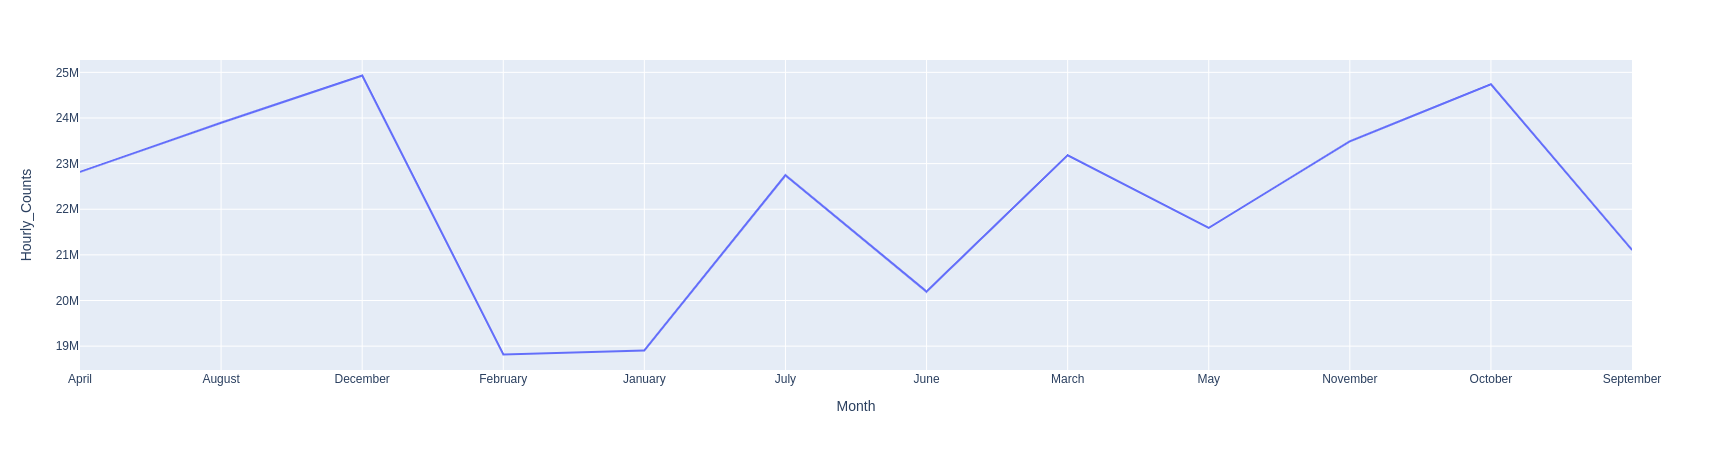

In [73]:
import plotly.express as px

px.line(months_2019_df, x="Month", y="Hourly_Counts")

Problems:
1. It's alphabetically sorted
2. 1. y-axis is truncated
3. Data points aren't easily identifable
4. Plot is not well documented

Let's fix these!

In [74]:
# sort by month numbers
from datetime import datetime

sorted_months_2019_df = months_2019_df.sort_values(
    by="Month", 
    key=lambda series:pd.to_datetime(series, format="%B").dt.month
)

,Month,Hourly_Counts
4,January,18904686
3,February,18816254
7,March,23181242
0,April,22818120
8,May,21590920
6,June,20194222
5,July,22744685
1,August,23896524
11,September,21107792
10,October,24738547


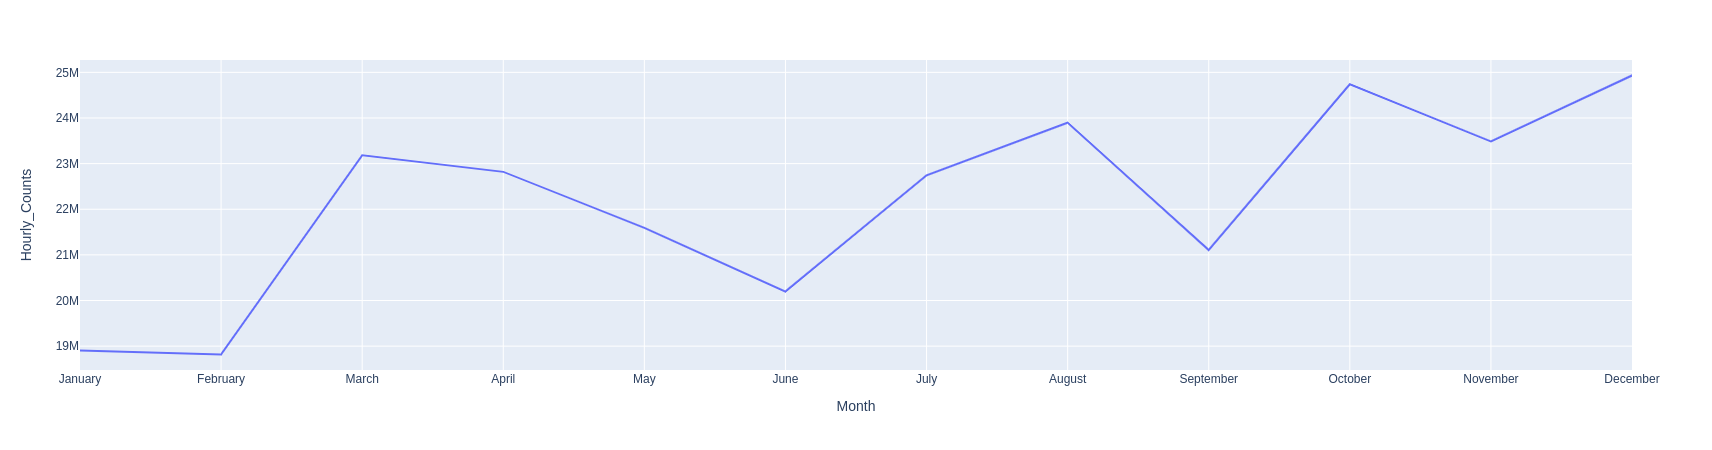

In [75]:
px.line(sorted_months_2019_df, x="Month", y="Hourly_Counts")

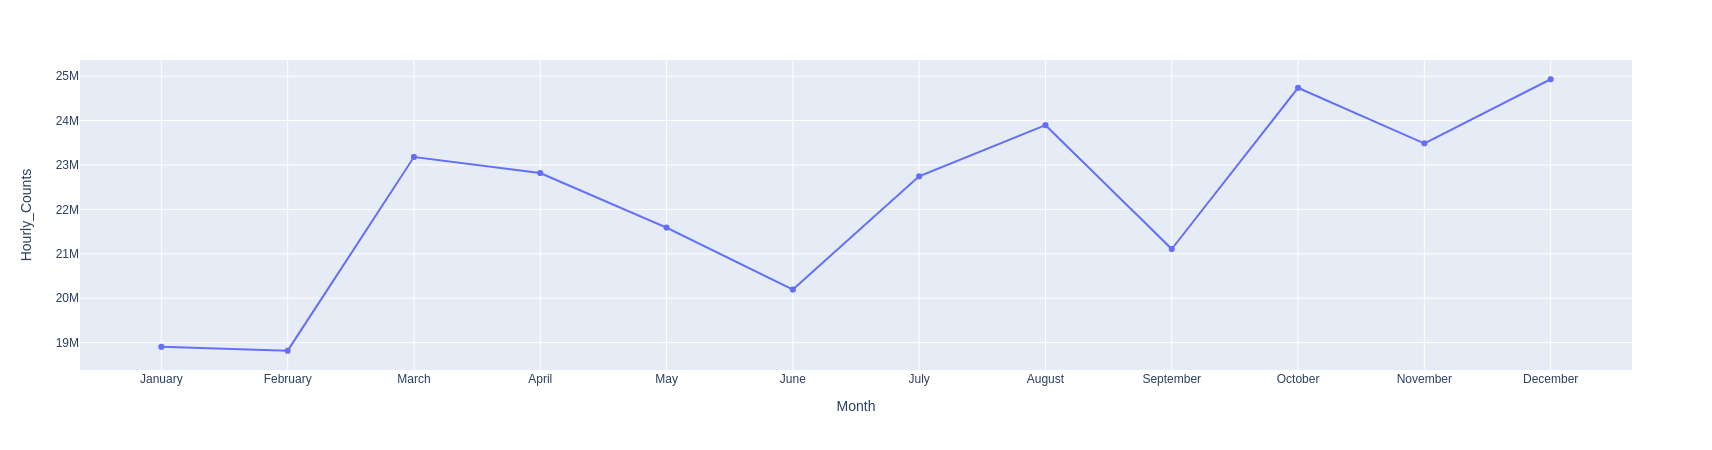

In [76]:
# add markers to data points

figure = px.line(sorted_months_2019_df, x="Month", y="Hourly_Counts")
figure.update_traces(mode='lines+markers')

#### __*Hot Tip:*__ Always title your plots!

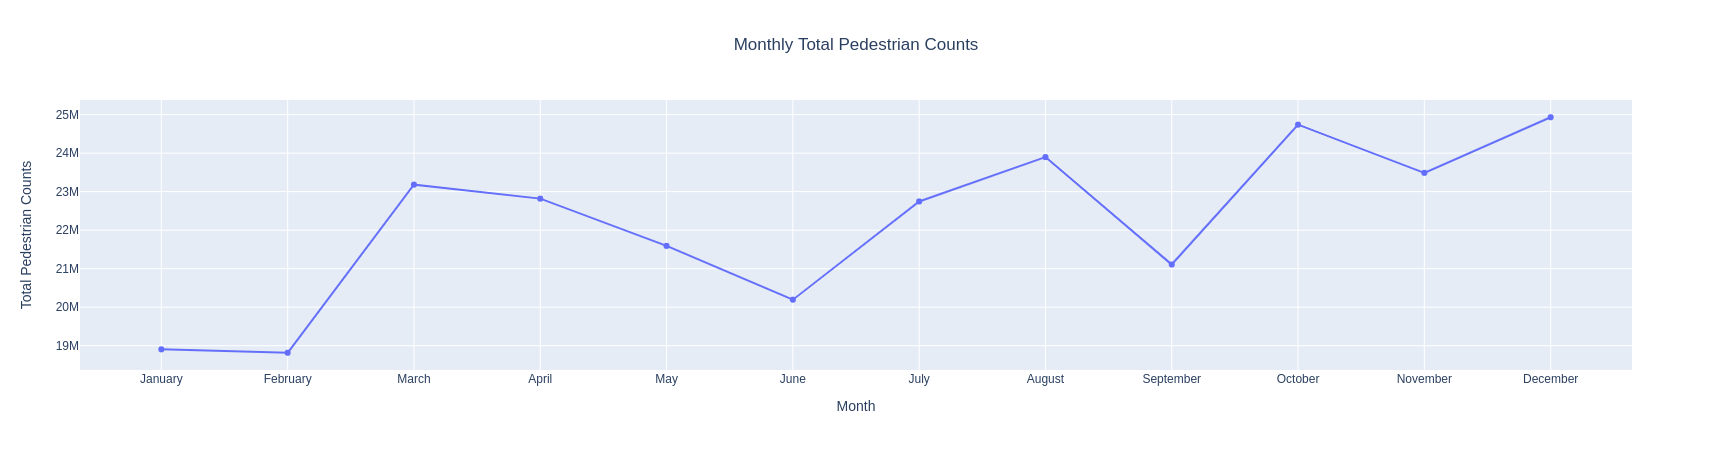

In [77]:
# Improve accessability of the plot with title and better y-axis label

figure = px.line(
    sorted_months_2019_df, 
    x="Month", 
    y="Hourly_Counts", 
    title="Monthly Total Pedestrian Counts"
)
figure.update_traces(mode='lines+markers')
figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)

## Q1: _What does monthly traffic look like across years?_

We have a way to visualise monthly traffic over a single year.

Problems:
* It's spread over many notebooks cells
* Changing the year is annoying


#### __*Hot Tip:*__ Move code into reusable functions!

In [78]:
def plot_months(counts_df, year):
    """Plot Monthly traffic for a given year."""
    
    # 1. Collect and shape data
    year_df = counts_df[counts_df["Year"] == year]
    months_df = year_df.groupby("Month")["Hourly_Counts"].sum().reset_index()
    sorted_months_df = months_df.sort_values(
        by="Month", 
        key=lambda x:pd.to_datetime(x, format="%B").dt.month
    )

    # 2. Make plot
    figure = px.line(
        sorted_months_df, 
        x="Month", 
        y="Hourly_Counts", 
        title="Monthly Total Pedestrian Counts"
    )
    
    # 3. Fine-tune plot's appearance 
    figure.update_traces(mode='lines+markers')
    figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)
    
    return figure

Note common pattern when building plots:

1. Collect and shape data
2. Make plot
3. Fine-tune plot's appearance

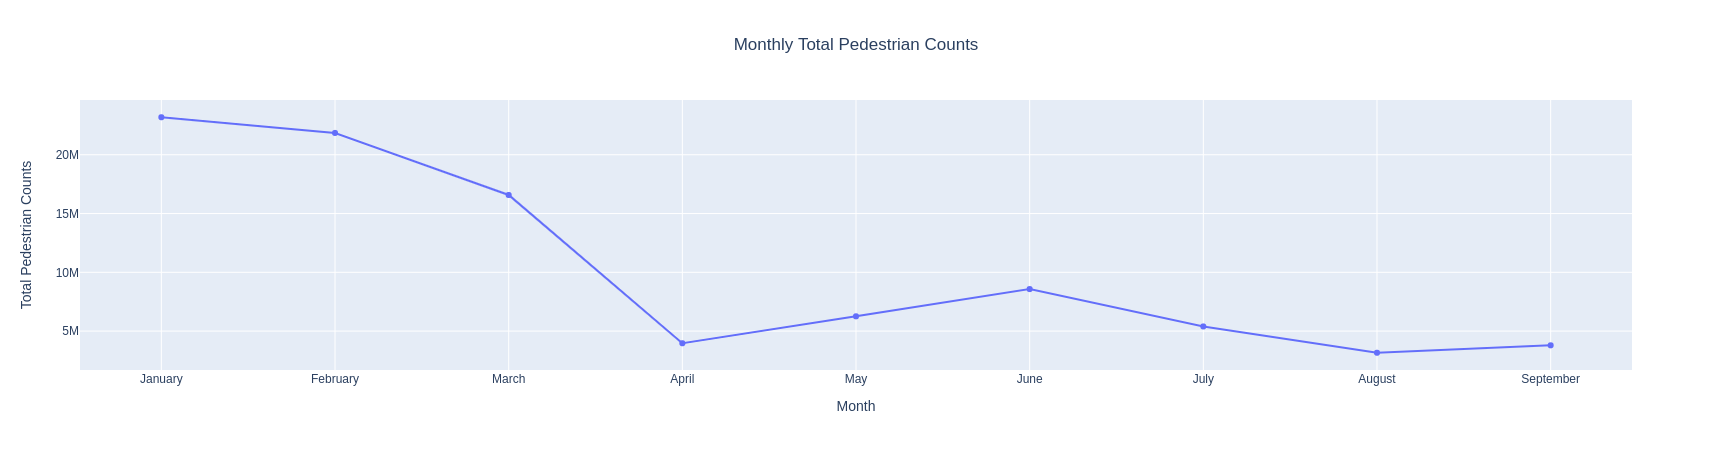

In [79]:
plot_months(counts_df, 2020)

Problem: Answering questions about different years is still slower than would be nicce.


### Using ipywidgets to make an interactive tool!

In [80]:
from ipywidgets import interact, fixed

interact(plot_months, year=2019, counts_df=fixed(counts_df))

interactive(children=(IntSlider(value=2019, description='year', max=6057, min=-2019), Output()), _dom_classes=…

<function __main__.plot_months(counts_df, year)>

In [81]:
interact(plot_months, year=range(2009, 2021), counts_df=fixed(counts_df));

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

Another problem: truncated y-axis is misleading when comparing.

In [82]:
# add a truncate_y parameter to our function

def plot_months(counts_df, year, truncate_y=False):
    """Plot Monthly traffic for a given year."""
    
    # 1. Collect and shape data
    year_df = counts_df[counts_df["Year"] == year]
    months_df = year_df.groupby("Month")["Hourly_Counts"].sum().reset_index()
    sorted_months_df = months_df.sort_values(
        by="Month", 
        key=lambda x:pd.to_datetime(x, format="%B").dt.month
    )

    # 2. Make plot
    figure = px.line(
        sorted_months_df, 
        x="Month", 
        y="Hourly_Counts", 
        title="Monthly Total Pedestrian Counts"
    )
    
    # 3. Fine-tune plot's appearance 
    figure.update_traces(mode='lines+markers')
    figure.update_layout(yaxis_title="Total Pedestrian Counts", title_x=0.5)
    if not truncate_y:
        figure.update_layout(yaxis_rangemode='tozero')
    
    return figure

In [83]:
interact(plot_months, year=range(2009, 2021), counts_df=fixed(counts_df));

interactive(children=(Dropdown(description='year', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20…

#### __*Hot Tip:*__ Share you interactive visualisation with ngrok and Voila

### Abstracting The filtering out of our plotting function

In [84]:
import numbers
import collections

def filter_df(df, year=None, month=None, sensor=None):
    """Filter a pedestrian counts DataFrame

    All params {year, month, sensor} take a value or sequence of values
    filtering the input DataFrame to only rows that matches those values. (A
    sequence filters to rows with fields matching *any* value in the sequence)
    """
    params = {"Year": year, "Sensor_Name": sensor, "Month": month}
    for param, param_val in params.items():
        if param_val is None:
            continue
        elif is_value(param_val):
            param_val = [param_val]
        elif isinstance(param_val, collections.abc.Iterable):
            param_val = list(param_val)
        else:
            raise Exception(
                f"Invalid value {param_val}, params must be str, numeric, or"
                " an iterable"
            )
        if len(param_val) == 0:
            continue
        df = df[df[param].isin(set(param_val))]
    return df


def is_value(obj):
    """Check if an object is a string or numeric value"""
    return isinstance(obj, str) or isinstance(obj, numbers.Number)

In [95]:
# get all records from 2020, for the following sen:
sensors = ["Lygon St (East)", "Lygon St (West)", "Faraday St-Lygon St (West)"]
lygon_2020_df = filter_df(counts_df, year=2020, sensor=sensors)

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
ID,,,,,,,,,
2966866,2020-01-01 00:00:00,2020,January,1,Wednesday,0,31,Lygon St (West),224
2966870,2020-01-01 00:00:00,2020,January,1,Wednesday,0,37,Lygon St (East),109
2966884,2020-01-01 00:00:00,2020,January,1,Wednesday,0,50,Faraday St-Lygon St (West),103
2966922,2020-01-01 01:00:00,2020,January,1,Wednesday,1,31,Lygon St (West),105
2966926,2020-01-01 01:00:00,2020,January,1,Wednesday,1,37,Lygon St (East),143
...,...,...,...,...,...,...,...,...,...
3347249,2020-09-30 22:00:00,2020,September,30,Wednesday,22,37,Lygon St (East),11
3347263,2020-09-30 22:00:00,2020,September,30,Wednesday,22,50,Faraday St-Lygon St (West),11
3347305,2020-09-30 23:00:00,2020,September,30,Wednesday,23,31,Lygon St (West),17


### A different version

In [86]:
# second version by sensors with bar charts

def plot_month_counts(df, split_sensors=False, **kwargs):
    """Make a bar plot of monthly counts"""
    if split_sensors:
        group_cols = ["Month", "Sensor_Name"]
        color = "Sensor_Name"
    else:
        group_cols = ["Month"]
        color = None
    
    # 1. Collect and shape data
    month_df = (
        df.groupby(group_cols)["Hourly_Counts"]
        .sum()
        .reset_index()
        .sort_values(by="Month", key=lambda x: pd.to_datetime(x, format="%B").dt.month)
    )

    # 2. Make plot
    figure = px.bar(
        month_df,
        x="Month",
        y="Hourly_Counts",
        barmode="group",
        color=color,
        title="Monthly Sensor Traffic",
        **kwargs,
    )

    # 3. Fine-tune plot's appearance
    figure.update_layout(
        title_x=0.5,
        yaxis_title="Total Counts",
        yaxis_showgrid=False,
        yaxis_zeroline=False,
        xaxis_title=None,
        legend=dict(
            title_text="",
            orientation="h",
            yanchor="bottom",
            y=-0.6,
            xanchor="right",
            x=1,
        ),
    )
    return figure

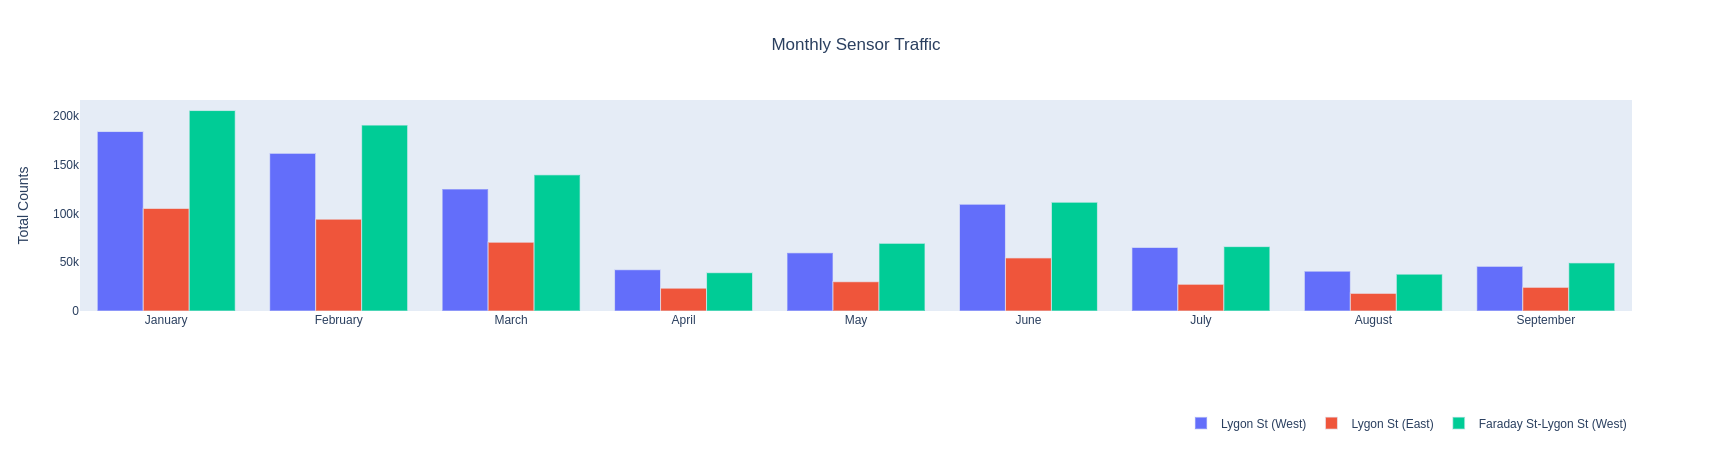

In [87]:
plot_month_counts(lygon_2020_df, split_sensors=True)

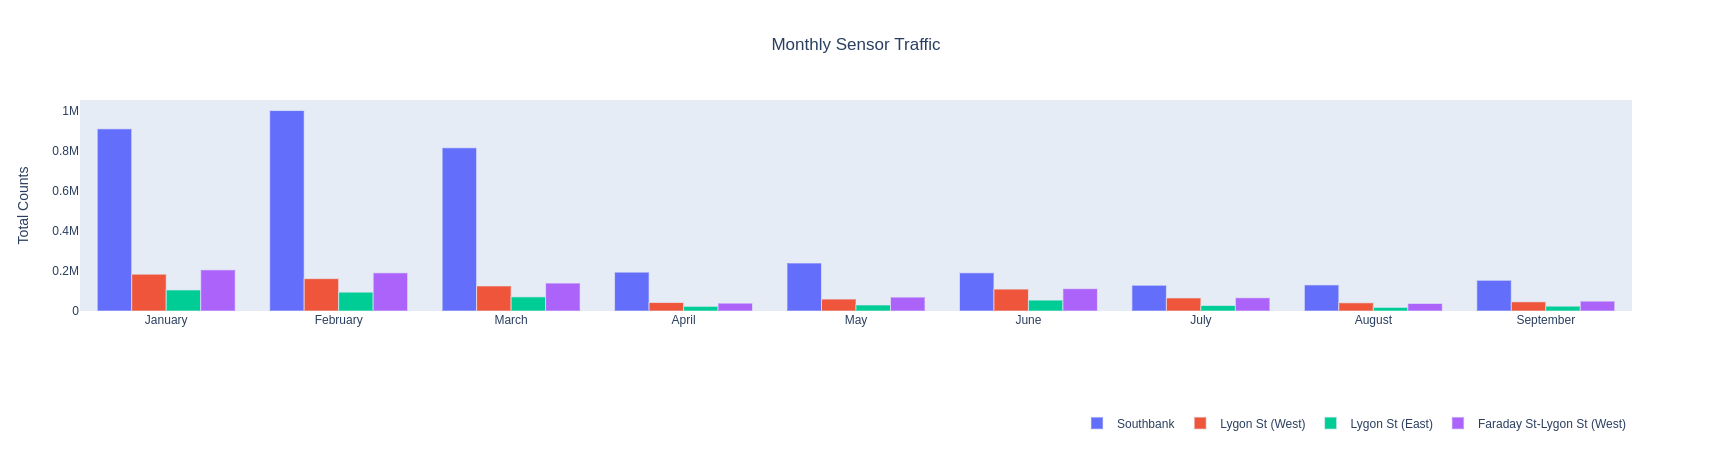

In [88]:
sensors = ["Lygon St (East)", "Lygon St (West)", "Faraday St-Lygon St (West)", "Southbank"]
new_2020_df = filter_df(counts_df, year=2020, sensor=sensors)
plot_month_counts(new_2020_df, split_sensors=True)

## Q2: _What does daily traffic look like?_

In [89]:
def plot_sensor_traffic(
    df,
    same_yscale=False,
    row_height=150,
    limit=5,
    **kwargs,
):
    """Plot hourly traffic for one or more sensors"""
    
    # 1. Collect and shape data
    target_sensors = (
        df.groupby("Sensor_Name")["Hourly_Counts"].sum().sort_values(ascending=False)
    )[:limit]
    df = df[df["Sensor_Name"].isin(set(target_sensors.index))]

    # 2. Make plot
    if "height" not in kwargs:
        kwargs["height"] = max(len(target_sensors) * row_height, 400)
    figure = px.line(
        df,
        y="Hourly_Counts",
        x="Date_Time",
        facet_row="Sensor_Name",
        title="Hourly Pedestrian Traffic by Sensor",
        category_orders={"Sensor_Name": list(target_sensors.index)},
        **kwargs,
    )
    
    # 3. Fine-tune plot's appearance
    figure.update_layout(title_x=0.5)
    figure.update_yaxes(
        matches=None if same_yscale else "y",
        showgrid=False,
        zeroline=False,
        title_text=None,
    )
    figure.update_xaxes(showgrid=True, title_text=None)
    figure.for_each_annotation(
        lambda a: a.update(textangle=0, text=a.text.split("=")[-1])
    )
    return figure

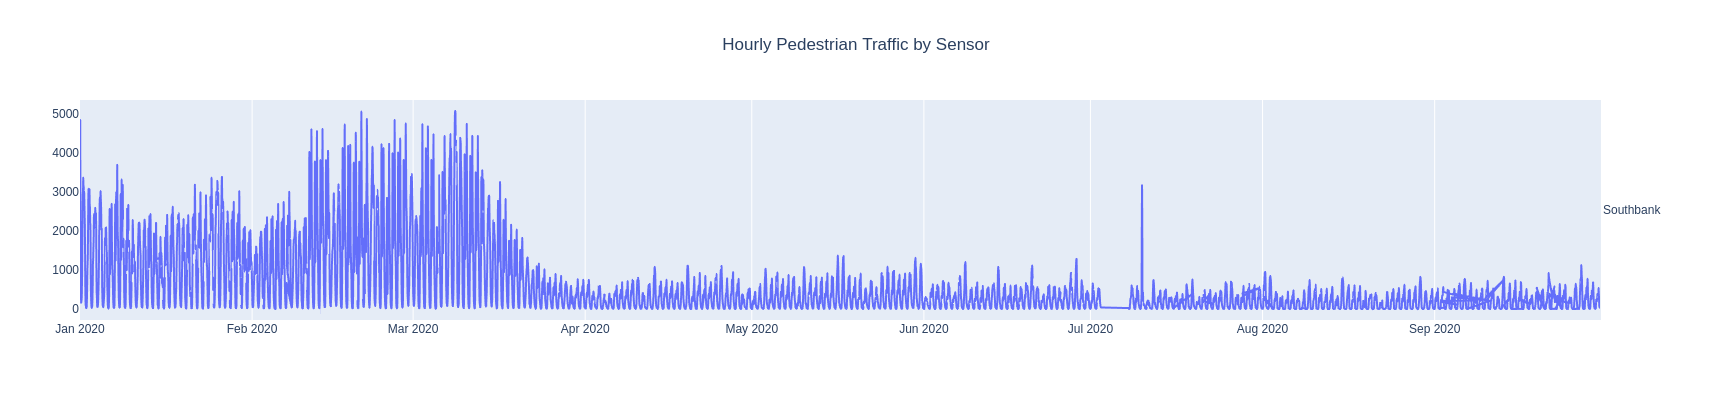

In [90]:
counts_2020_df = filter_df(counts_df, year=2020, sensor="Southbank")
plot_sensor_traffic(counts_2020_df)

## Q3: _What are the most trafficked parts of Melbourne’s CBD?_

In [91]:
# load the sensors datasets

sensors_df = pd.read_csv(sensor_csv_path, index_col="sensor_id")

,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
sensor_id,,,,,,,,,,
59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)"
23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)"
20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)"
34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)"
57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)"
...,...,...,...,...,...,...,...,...,...,...
39,Alfred Place,AlfPl_T,2019/12/04,A,In 4/12/2019 sensor upgraded,South,North,-37.813797,144.969957,"(-37.81379749, 144.96995745)"
17,Collins Place (South),Col15_T,2009/03/30,A,Device is upgraded in 26/02/2020,East,West,-37.813625,144.973236,"(-37.81362542, 144.97323592)"
65,Swanston St - City Square,SwaCs_T,2020/03/12,A,NaN,North,South,-37.815694,144.966806,"(-37.81569416, 144.96680641)"


In [92]:
from melbviz.config import MAPBOX_KEY

px.set_mapbox_access_token(MAPBOX_KEY)


def plot_sensor_map(df, **kwargs):
    """Plot a spatial scatter plot of sensor traffic."""
    
    # 1. Collect and shape data
    sensor_totals_df = (
        df.groupby("Sensor_Name")
        .agg(
            {
                "Hourly_Counts": sum,
                "latitude": lambda x: x.iloc[0],
                "longitude": lambda x: x.iloc[0],
            }
        )
        .reset_index()
        .rename(columns={"Hourly_Counts": "Total Counts"})
    )
    
    # 2. Make plot
    figure = px.scatter_mapbox(
        sensor_totals_df,
        lat="latitude",
        lon="longitude",
        color="Total Counts",
        size="Total Counts",
        text="Sensor_Name",
        color_continuous_scale=px.colors.sequential.Plasma,
        size_max=50,
        zoom=13,
        title="Sensor Traffic",
        **kwargs,
    )

    # 3. Fine-tune plot's appearance
    figure.update_layout(title_x=0.5)
    return figure

This function requires sensor lat/lon information, so we'll use an already joined dataset:

In [93]:
from melbviz.pedestrian import PedestrianDataset
from melbviz.config import DATA_PATH, COUNTS_CSV_PATH, SENSOR_CSV_PATH

data = PedestrianDataset.load(COUNTS_CSV_PATH, sensor_csv_path=SENSOR_CSV_PATH);

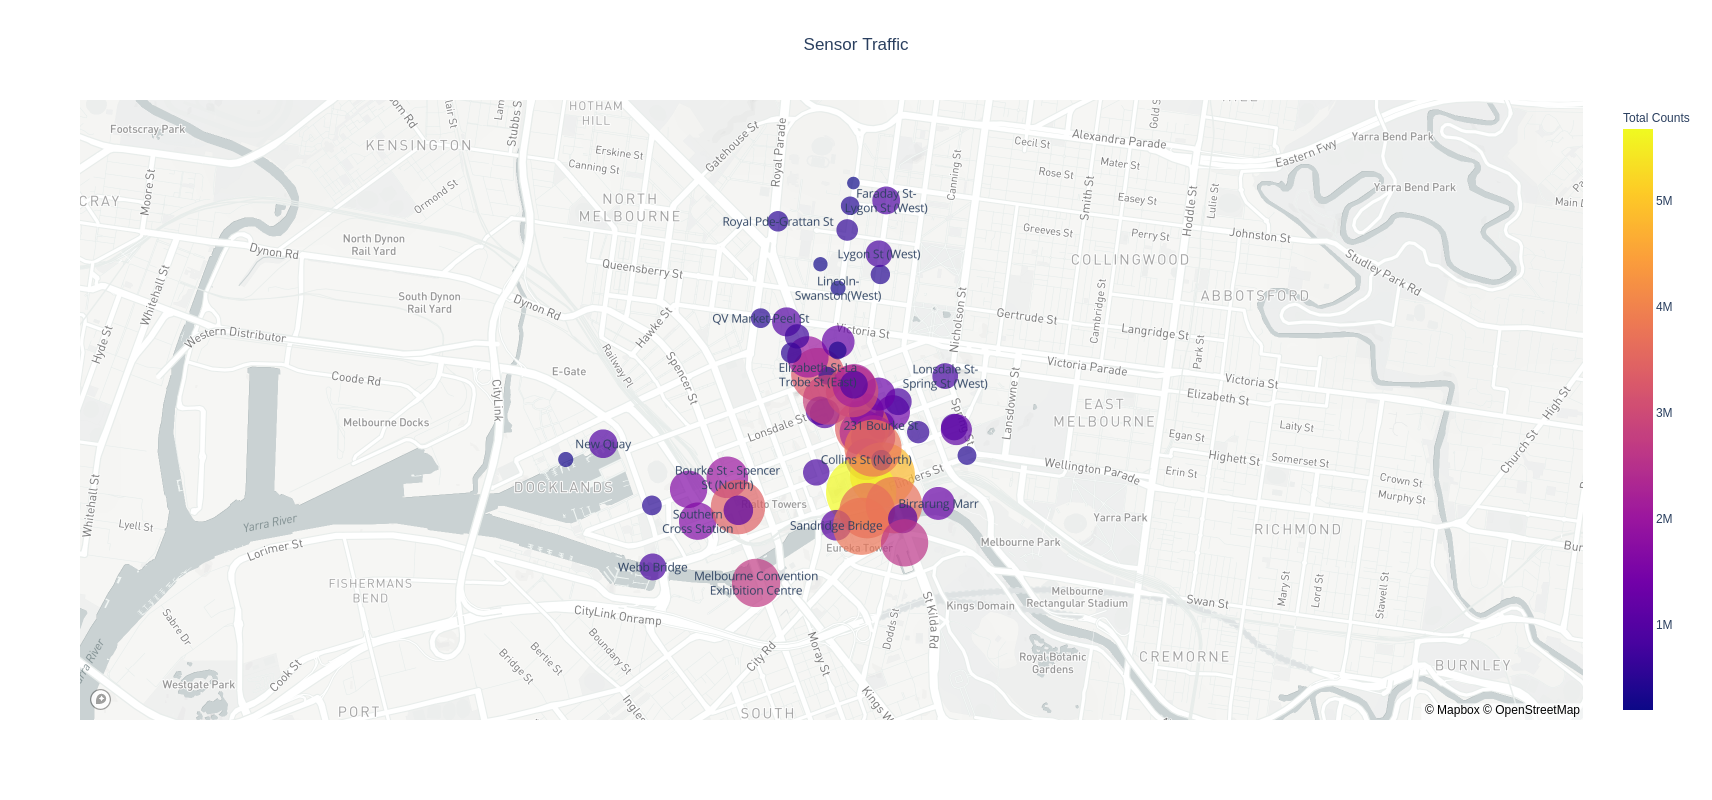

In [94]:
counts_2020_df = filter_df(counts_df, year=2020)
plot_sensor_map(data.filter(year=2020).df, height=800)

### How do we share our interfaces?

Option 1: Voila + ngrok

#### Option 2: Dash and deploy somewhere

## Some Resources

### Getting Started with Jupyter Lab
I recommend the Anaconda Python distribution: [anaconda.com](https://www.anaconda.com)

<img src="img/anaconda_logo.png" width="300"/>



### Tools for Building Data Apps

<img src="img/data_app_libs.png" width="300"/>

See my talk surveying all of them: [youtu.be/jI5zLf9Hvd8](https://youtu.be/jI5zLf9Hvd8)